In [398]:
%matplotlib notebook
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import matplotlib.patches as mpatches


# File to Load (Remember to Change These)
file_to_load = "ArrestSet.csv"
rec_to_load = "NFL_Records.csv"

# Read Purchasing File and store into Pandas data frame
arrestData = pd.read_csv(file_to_load)
recData = pd.read_csv(rec_to_load)
recData.head()

,Team,2011,2012,2013,2014,2015
0,Arizona,0.500,0.313,0.625,0.500,0.813
1,Atlanta,0.625,0.813,0.250,0.375,0.500
2,Baltimore,0.750,0.625,0.500,0.625,0.313
3,Buffalo,0.375,0.375,0.375,0.563,0.500
4,Carolina,0.375,0.438,0.750,0.468,0.938


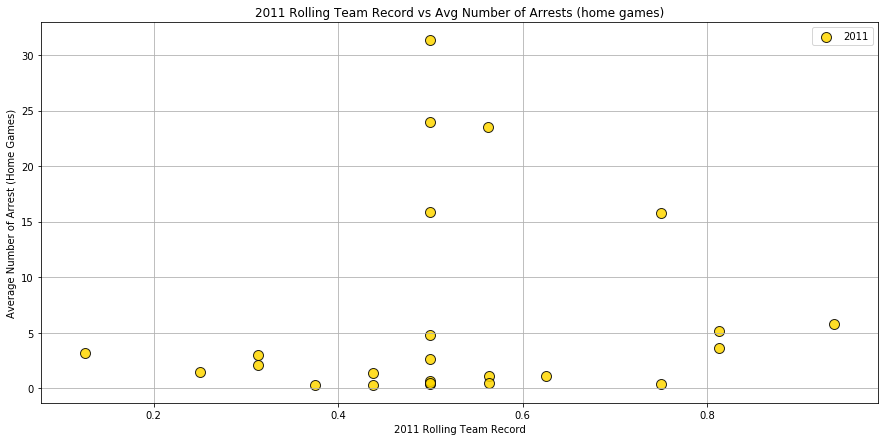

In [399]:
#Scatterplot

#pull out pertinent data
rollingData = arrestData[["season","home_team","away_team","home_score","away_score","arrests"]]

#Calculate the moving average (average record from current year to 2011)
rollingRecord = pd.DataFrame(recData["Team"])
rollingRecord["2011Rec"] = recData["2011"]
rollingRecord["2012Rec"] = (recData["2011"] + recData["2012"])/2
rollingRecord["2013Rec"] = (recData["2011"] + recData["2012"] + recData["2013"])/3
rollingRecord["2014Rec"] = (recData["2011"] + recData["2012"] + recData["2013"] + recData["2014"])/4
rollingRecord["2015Rec"] = (recData["2011"] + recData["2012"] + recData["2013"] + recData["2014"] + recData["2015"])/5


homeArrests = rollingData[["season","home_team","arrests"]]
homeArrests = homeArrests.rename(columns = {'home_team':"Team"})
fullSet = pd.merge(homeArrests,rollingRecord,how = 'left', on = 'Team')
fullSet= fullSet.groupby(['season','Team']).mean().dropna().reset_index()
set2011= fullSet.loc[fullSet['season'] == 2011]
set2012= fullSet.loc[fullSet['season'] == 2012]
set2013= fullSet.loc[fullSet['season'] == 2013]
set2014= fullSet.loc[fullSet['season'] == 2014]
set2015= fullSet.loc[fullSet['season'] == 2015]
fig, ax = plt.subplots(figsize=(15,7))

plt.scatter(set2011['2011Rec'],set2011['arrests'], marker='o', s = 100, facecolors='gold',edgecolors='black', label = "2011", alpha = 0.85)
plt.legend()

plt.xlabel('2011 Rolling Team Record')
plt.ylabel('Average Number of Arrest (Home Games)')
plt.title('2011 Rolling Team Record vs Avg Number of Arrests (home games)')
plt.grid()

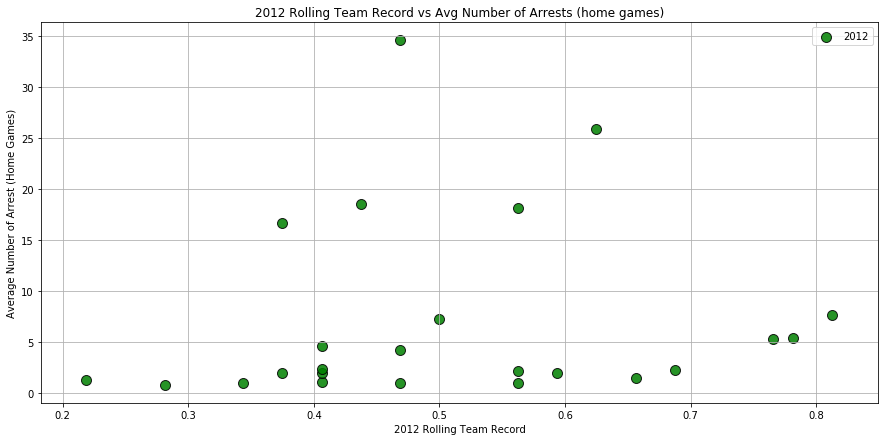

In [400]:
fig, ax = plt.subplots(figsize=(15,7))
plt.scatter(set2012['2012Rec'],set2012['arrests'], marker='o', s = 100, facecolors='green',edgecolors='black', label = "2012", alpha = 0.85)
plt.legend()
plt.xlabel('2012 Rolling Team Record')
plt.ylabel('Average Number of Arrest (Home Games)')
plt.title('2012 Rolling Team Record vs Avg Number of Arrests (home games)')
plt.grid()

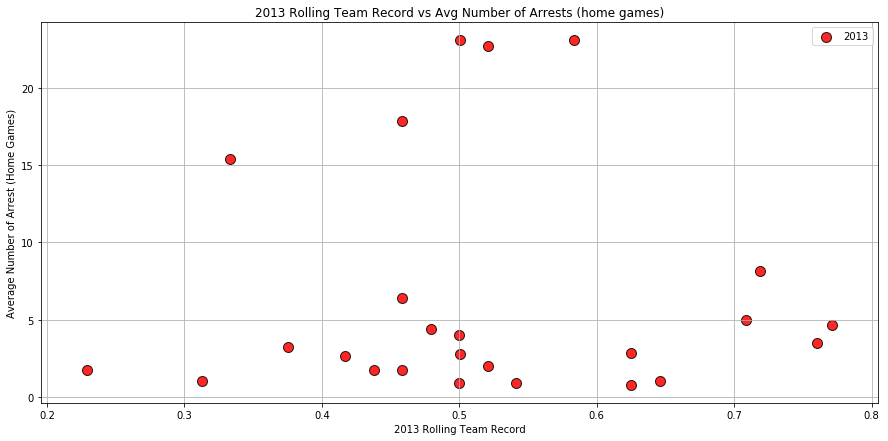

In [401]:
fig, ax = plt.subplots(figsize=(15,7))
plt.scatter(set2013['2013Rec'],set2013['arrests'], marker='o', s = 100, facecolors='red',edgecolors='black', label = "2013", alpha = 0.85)
plt.legend()
plt.xlabel('2013 Rolling Team Record')
plt.ylabel('Average Number of Arrest (Home Games)')
plt.title('2013 Rolling Team Record vs Avg Number of Arrests (home games)')
plt.grid()

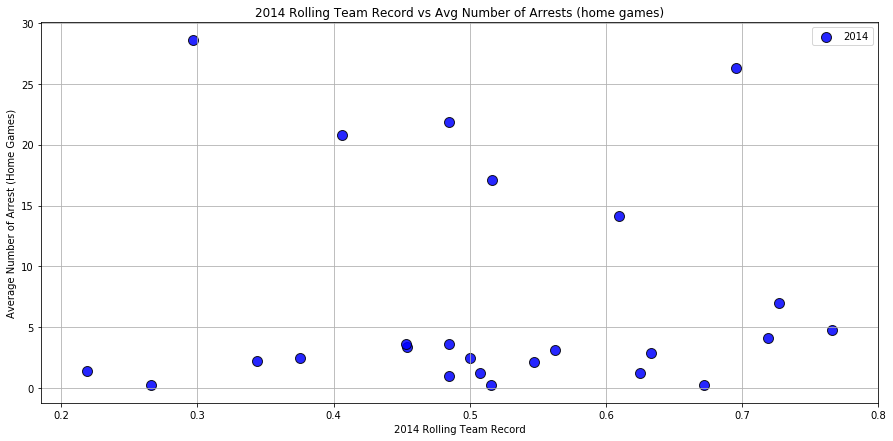

In [402]:
fig, ax = plt.subplots(figsize=(15,7))
plt.scatter(set2014['2014Rec'],set2014['arrests'], marker='o', s = 100, facecolors='blue',edgecolors='black', label = "2014", alpha = 0.85)
plt.legend()
plt.xlabel('2014 Rolling Team Record')
plt.ylabel('Average Number of Arrest (Home Games)')
plt.title('2014 Rolling Team Record vs Avg Number of Arrests (home games)')
plt.grid()

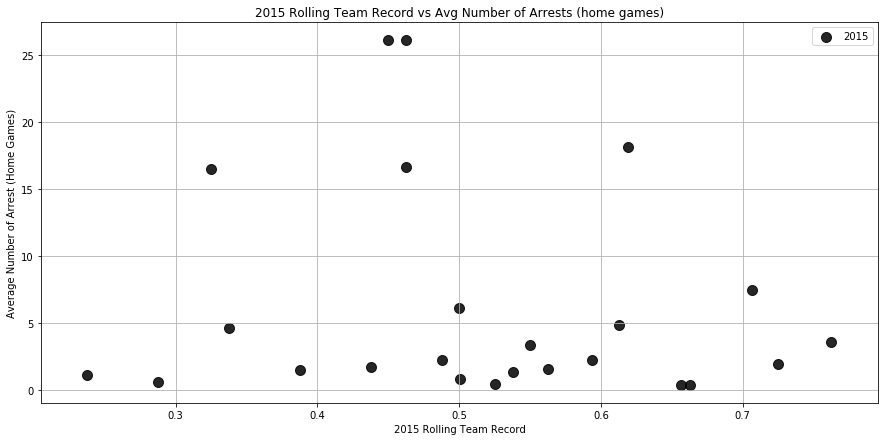

In [403]:
fig, ax = plt.subplots(figsize=(15,7))
plt.scatter(set2015['2015Rec'],set2015['arrests'], marker='o', s = 100, facecolors='black',edgecolors='black', label = "2015", alpha = 0.85)
plt.legend()
plt.xlabel('2015 Rolling Team Record')
plt.ylabel('Average Number of Arrest (Home Games)')
plt.title('2015 Rolling Team Record vs Avg Number of Arrests (home games)')
plt.grid()

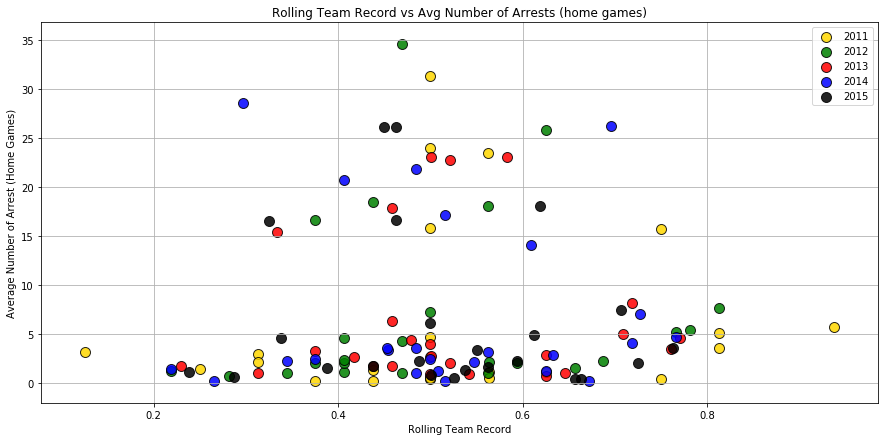

In [404]:
fig, ax = plt.subplots(figsize=(15,7))
plt.scatter(set2011['2011Rec'],set2011['arrests'], marker='o', s = 100, facecolors='gold',edgecolors='black', label = "2011", alpha = 0.85)
plt.scatter(set2012['2012Rec'],set2012['arrests'], marker='o', s = 100, facecolors='green',edgecolors='black', label = "2012", alpha = 0.85)
plt.scatter(set2013['2013Rec'],set2013['arrests'], marker='o', s = 100, facecolors='red',edgecolors='black', label = "2013", alpha = 0.85)
plt.scatter(set2014['2014Rec'],set2014['arrests'], marker='o', s = 100, facecolors='blue',edgecolors='black', label = "2014", alpha = 0.85)
plt.scatter(set2015['2015Rec'],set2015['arrests'], marker='o', s = 100, facecolors='black',edgecolors='black', label = "2015", alpha = 0.85)
plt.legend()

plt.xlabel('Rolling Team Record')
plt.ylabel('Average Number of Arrest (Home Games)')
plt.title('Rolling Team Record vs Avg Number of Arrests (home games)')
plt.grid()
plt.savefig("RollingTeamRecord.png", bbox_inches="tight")

In [405]:
sanAvg =  fullSet.loc[fullSet['Team'] == 'San Diego']
sanAvg = sanAvg.loc[sanAvg['season']== 2015]
sanAvg = sanAvg['2015Rec']
nyjAvg = fullSet.loc[fullSet['Team'] == 'New York Jets']
nyjAvg = nyjAvg.loc[nyjAvg['season']== 2015]
nyjAvg = nyjAvg['2015Rec']
nygAvg = fullSet.loc[fullSet['Team'] == 'New York Giants']
nygAvg = nygAvg.loc[nygAvg['season']== 2015]
nygAvg = nygAvg['2015Rec']
oakAvg = fullSet.loc[fullSet['Team'] == 'Oakland']
oakAvg = oakAvg.loc[oakAvg['season']== 2015]
oakAvg = oakAvg['2015Rec']
pitAvg = fullSet.loc[fullSet['Team'] == 'Pittsburgh']
pitAvg = pitAvg.loc[pitAvg['season']== 2015]
pitAvg = pitAvg['2015Rec']
pitAvg

115    0.6126
Name: 2015Rec, dtype: float64

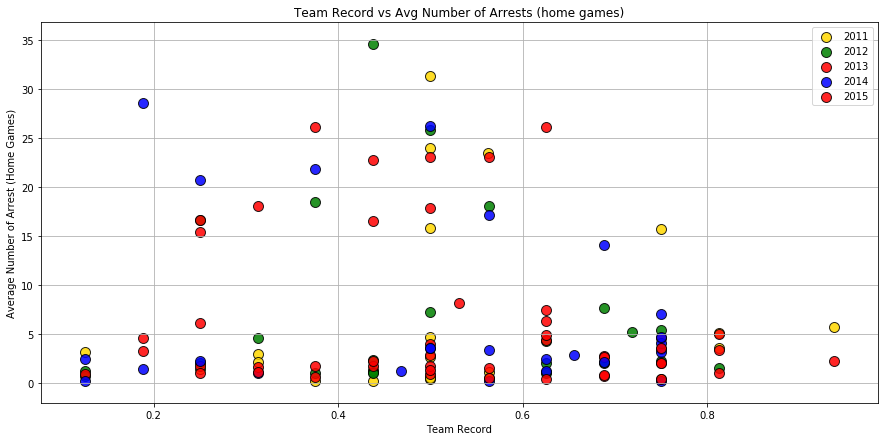

In [406]:
homeArrests = rollingData[["season","home_team","arrests"]]
homeArrests = homeArrests.rename(columns = {'home_team':"Team"})
fullSet = pd.merge(homeArrests,recData,how = 'left', on = 'Team')
fullSet= fullSet.groupby(['season','Team']).mean().dropna().reset_index()
set2011= fullSet.loc[fullSet['season'] == 2011]
set2012= fullSet.loc[fullSet['season'] == 2012]
set2013= fullSet.loc[fullSet['season'] == 2013]
set2014= fullSet.loc[fullSet['season'] == 2014]
set2015= fullSet.loc[fullSet['season'] == 2015]
fig, ax = plt.subplots(figsize=(15,7))
plt.scatter(set2011['2011'],set2011['arrests'], marker='o', s = 100, facecolors='gold',edgecolors='black', label = "2011", alpha = 0.85)
plt.scatter(set2012['2012'],set2012['arrests'], marker='o', s = 100, facecolors='green',edgecolors='black', label = "2012", alpha = 0.85)
plt.scatter(set2013['2013'],set2013['arrests'], marker='o', s = 100, facecolors='red',edgecolors='black', label = "2013", alpha = 0.85)
plt.scatter(set2014['2014'],set2014['arrests'], marker='o', s = 100, facecolors='blue',edgecolors='black', label = "2014", alpha = 0.85)
plt.scatter(set2015['2015'],set2015['arrests'], marker='o', s = 100, facecolors='red',edgecolors='black', label = "2015", alpha = 0.85)
plt.legend()
plt.xlabel('Team Record')
plt.ylabel('Average Number of Arrest (Home Games)')
plt.title('Team Record vs Avg Number of Arrests (home games)')
plt.grid()
plt.savefig("YearlyTeamRecordvsArrests.png", bbox_inches="tight")

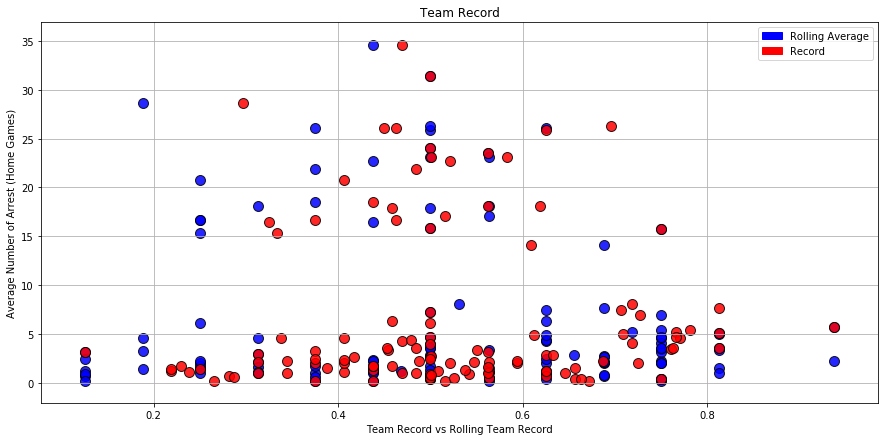

In [408]:
homeArrests = rollingData[["season","home_team","arrests"]]
homeArrests = homeArrests.rename(columns = {'home_team':"Team"})
fullSet = pd.merge(homeArrests,recData,how = 'left', on = 'Team')
fullSet= fullSet.groupby(['season','Team']).mean().dropna().reset_index()
set2011= fullSet.loc[fullSet['season'] == 2011]
set2012= fullSet.loc[fullSet['season'] == 2012]
set2013= fullSet.loc[fullSet['season'] == 2013]
set2014= fullSet.loc[fullSet['season'] == 2014]
set2015= fullSet.loc[fullSet['season'] == 2015]
fig, ax = plt.subplots(figsize=(15,7))
plt.scatter(set2011['2011'],set2011['arrests'], marker='o', s = 100, facecolors='blue',edgecolors='black', label = "Rolling Average", alpha = 0.85)
plt.scatter(set2012['2012'],set2012['arrests'], marker='o', s = 100, facecolors='blue',edgecolors='black', label = "Rolling Average", alpha = 0.85)
plt.scatter(set2013['2013'],set2013['arrests'], marker='o', s = 100, facecolors='blue',edgecolors='black', label = "Rolling Average", alpha = 0.85)
plt.scatter(set2014['2014'],set2014['arrests'], marker='o', s = 100, facecolors='blue',edgecolors='black', label = "Rolling Average", alpha = 0.85)
plt.scatter(set2015['2015'],set2015['arrests'], marker='o', s = 100, facecolors='blue',edgecolors='black', label = "Rolling Average", alpha = 0.85)
homeArrests = rollingData[["season","home_team","arrests"]]
homeArrests = homeArrests.rename(columns = {'home_team':"Team"})
fullSet = pd.merge(homeArrests,rollingRecord,how = 'left', on = 'Team')
fullSet= fullSet.groupby(['season','Team']).mean().dropna().reset_index()
set2011= fullSet.loc[fullSet['season'] == 2011]
set2012= fullSet.loc[fullSet['season'] == 2012]
set2013= fullSet.loc[fullSet['season'] == 2013]
set2014= fullSet.loc[fullSet['season'] == 2014]
set2015= fullSet.loc[fullSet['season'] == 2015]
plt.scatter(set2011['2011Rec'],set2011['arrests'], marker='o', s = 100, facecolors='red',edgecolors='black', label = "Record", alpha = 0.85)
plt.scatter(set2012['2012Rec'],set2012['arrests'], marker='o', s = 100, facecolors='red',edgecolors='black', label = "Record", alpha = 0.85)
plt.scatter(set2013['2013Rec'],set2013['arrests'], marker='o', s = 100, facecolors ='red',edgecolors='black', label = "Record", alpha = 0.85)
plt.scatter(set2014['2014Rec'],set2014['arrests'], marker='o', s = 100, facecolors='red',edgecolors='black', label = "Record", alpha = 0.85)
plt.scatter(set2015['2015Rec'],set2015['arrests'], marker='o', s = 100, facecolors='red',edgecolors='black', label = "Record", alpha = 0.85)
plt.xlabel('Team Record vs Rolling Team Record')
plt.ylabel('Average Number of Arrest (Home Games)')
plt.title('Team Record')
plt.grid()
red_patch = mpatches.Patch(color='red', label='Record')
blue_patch = mpatches.Patch(color = 'blue', label = 'Rolling Average')
plt.legend(handles = [blue_patch,red_patch])
plt.savefig("RollingvsRecord.png", bbox_inches="tight")

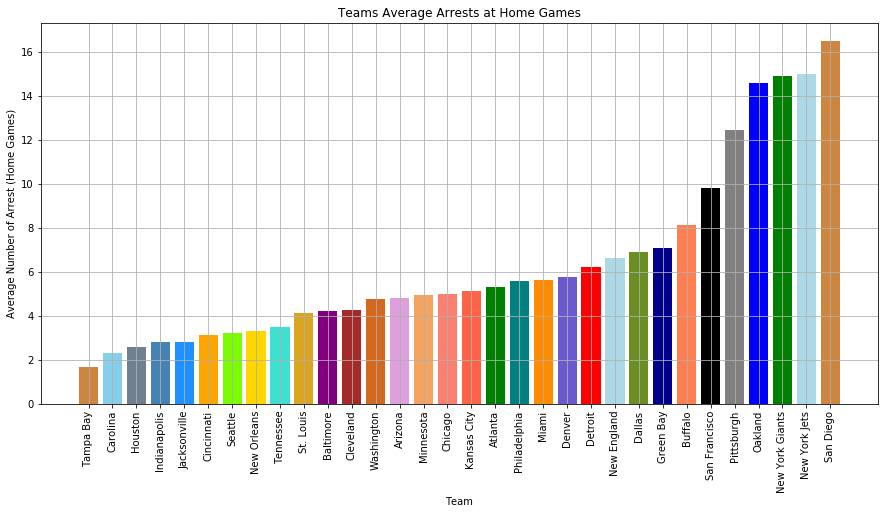

In [378]:
homeArrests = rollingData[['home_team','arrests']]
homeArrests = homeArrests.rename(columns = {"home_team":"team"})
avgArrests = avgArrests.groupby('team').mean()
avgArrests = avgArrests.reset_index()
avgArrests = avgArrests.rename(columns = {0:"arrests"})
avgArrests = avgArrests.sort_values('arrests', ascending = True)
colors = ['peru', 'skyblue','slategray','steelblue','dodgerblue','orange', 'lawngreen','gold','turquoise','goldenrod','purple','brown','chocolate','plum','sandybrown','salmon','tomato','green','teal','darkorange','slateblue','r','lightblue','olivedrab','darkblue','coral','black','grey','blue','green','lightblue']
fig, ax = plt.subplots(figsize=(15,7))
plt.bar(avgArrests['team'], avgArrests['arrests'], align="center", color = colors)
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Average Number of Arrest (Home Games)')
plt.title('Teams Average Arrests at Home Games')
plt.grid()
plt.savefig("TeamRecordvsArrests.png", bbox_inches="tight")

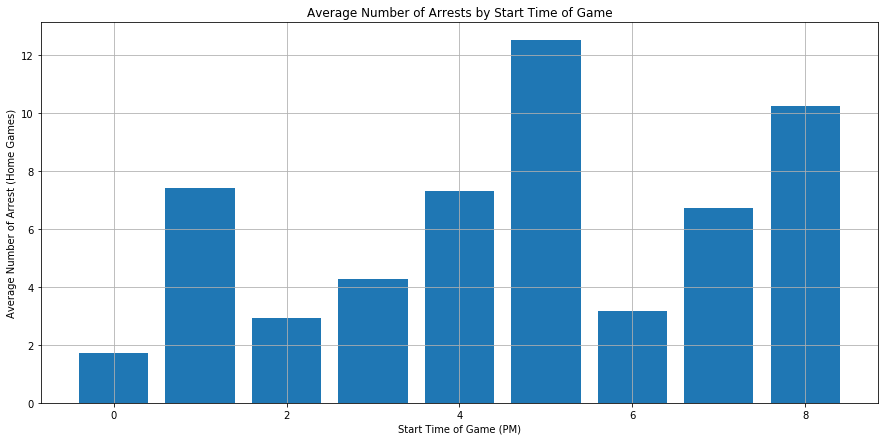

In [379]:
#pull out pertinent data
timeData = arrestData[['gametime_local','arrests']]
#rename column
timeData = timeData.rename(columns = {'gametime_local':'time'})
#pull out hour from time data
timeData['time'] = arrestData['gametime_local'].str.split(':').str.get(0)
timeData['time'] = timeData['time'].replace('12','0')
timeData['time'] = timeData['time'].astype(int)
#grouping time by hour, and find average # of arrests per hour
timeData = timeData.groupby('time').mean()
timeData =timeData.reset_index()

fig, ax = plt.subplots(figsize=(15,7))
plt.bar(timeData['time'],timeData['arrests'], align = 'center')
plt.xlabel('Start Time of Game (PM)')
plt.ylabel('Average Number of Arrest (Home Games)')
plt.title('Average Number of Arrests by Start Time of Game')
plt.grid()
plt.savefig("StartTimevsArrests.png", bbox_inches="tight")


In [382]:
timeData

,time,arrests
0,0,1.715278
1,1,7.414079
2,2,2.930233
3,3,4.268293
4,4,7.322034
5,5,12.500000
6,6,3.176471
7,7,6.720000
8,8,10.226804
